In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk
import pickle

## 1D function

In [2]:
def invex_func_1d(x):
    x_ = x*7+0.5
    y_ = 0.2*np.exp(-2*(x_+0.2)**2) + 0.8*np.cos(x_) - 0.1*x_**2 + 0.1*x_
    y = -y_/3.1 - 0.61
    return y

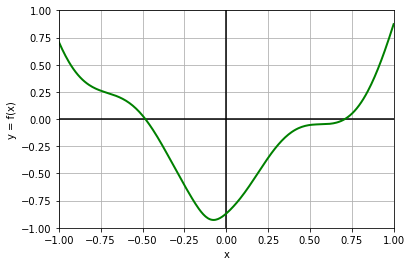

In [3]:
x = np.linspace(-1, 1, 300)
y = invex_func_1d(x)

%matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y, color='g', lw=2)
plt.hlines(0, -1, 1)
plt.vlines(0, -1, 1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid()
plt.show()

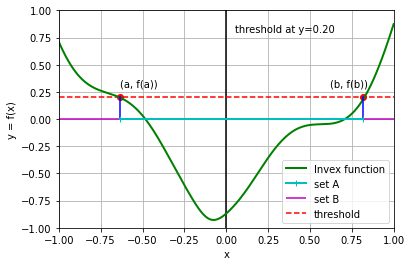

In [4]:
ycut = 0.2

_xin = x[y<=ycut]
_yin = y[y<=ycut]
_xmin, _xmax = _xin[0], _xin[-1]
_ymin, _ymax = _yin[0], _yin[-1]
_ymin, _ymax = ycut, ycut
# _xmin, _xmax, _ymin, _ymax


%matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y, color='g', lw=2, label="Invex function")
plt.plot([_xmin, _xmin], [_ymin, 0], color='b')
plt.plot([_xmax, _xmax], [_ymax, 0], color='b')
plt.plot([_xmax, _xmin], [0, 0], color='c', marker="|", lw=2, label="set A")
# plt.plot([_xmin, _xmax], [_ymin, _ymax], marker='o', color='r', linestyle='dashed')
plt.scatter([_xmin, _xmax], [_ymin, _ymax], marker='o', color='r')
plt.text(_xmin, _ymin+0.1, f"(a, f(a))")
plt.text(_xmax-0.2, _ymax+0.1, f"(b, f(b))")
plt.text(0.05, 0.8, f"threshold at y={ycut:.2f}")

plt.hlines(0, -1, 1, color='m', label="set B")
plt.vlines(0, -1, 1)
plt.hlines(ycut, -1, 1, lw=1.5, linestyle="dashed", color='r', label="threshold")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid()
plt.legend()
# plt.show()


In [5]:
'''
We get different decision boundary depending upon the threshold value.
Show that in multiple diagrams.
Done for 1D
'''

'\nWe get different decision boundary depending upon the threshold value.\nShow that in multiple diagrams.\nDone for 1D\n'

## 2D visualization - Invex

In [6]:
with open("./invex_out/2d_invx_plot_data2.pkl", 'rb') as f:
    data = pickle.load(f)

In [7]:
# data

In [8]:
x1, x2, y, center = data["x1"], data["x2"], data["y"]+1, data["center"]
center = (center[0], center[1], center[2]+1)

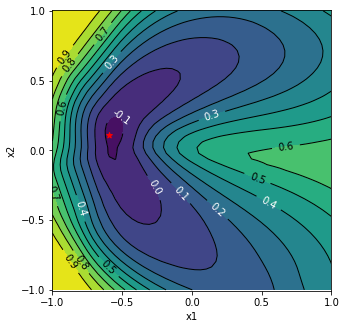

In [12]:
%matplotlib inline

# plt.figure(figsize=(6,6.2))
plt.figure(figsize=(6/6*5,6.2/6*5))
plt.axis('equal')

lvls = 12
plt.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)

clrs = ['white','white','white','white','white','white','white','k','k','k','k','k']
cs = plt.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", colors=clrs)

plt.scatter(center[0], center[1], color='red', marker='*')

# plt.title("(d)")

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.show()
plt.savefig("./invex_out/out_invex_contour.pdf")

In [13]:
# boundary0 = 
ba0, ba1 = np.nonzero(x1==-1)
bb0, bb1 = np.nonzero(x2==1)
bc0, bc1 = np.nonzero(x1==1)
bc0, bc1 = bc0[::-1], bc1[::-1]
bd0, bd1 = np.nonzero(x2==-1)
bd0, bd1 = bd0[::-1], bd1[::-1]

b0, b1 = np.concatenate((ba0,bb0,bc0,bd0)), np.concatenate((ba1,bb1,bc1,bd1))

bx1 = x1[b0,b1]
bx2 = x2[b0,b1]
by = y[b0,b1]

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


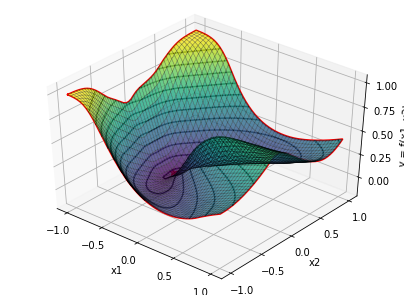

In [14]:
%matplotlib inline

fig = plt.figure(figsize=(7,6.2/6*5))
# fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(40, -50)

ax.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax.contour3D(x1, x2, y, alpha=0.9, levels=lvls, linestyles="None", colors="k")
ax.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)#'dimgray'

# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
# plt.title("(c)")

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f(x1, x2)')
# plt.pause(10)
# plt.show()
plt.savefig("./invex_out/out_invex_2d_func.pdf")

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


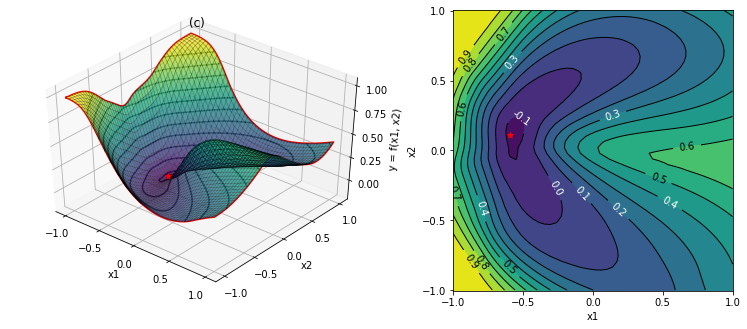

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(6/6*5+7+1,6.2/6*5))
# ax0 = fig.add_subplot(121,projection='3d')
# ax1 = fig.add_subplot(122)
# fig, (ax0, ax1) = plt.subplots(1, 2,
#                                gridspec_kw={'width_ratios': [3, 1]})
# ax1 = fig.add_gridspec()

gspec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[1.36,1])
ax0 = fig.add_subplot(gspec[0, 0], projection='3d')
ax1 = fig.add_subplot(gspec[0, 1])

ax1.axis('equal')
lvls = 12
ax1.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)

clrs = ['white','white','white','white','white','white','white','k','k','k','k','k','k']
cs = ax1.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
ax1.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", colors=clrs)

ax1.scatter(center[0], center[1], color='red', marker='*')

# ax1.set_title("(d)")

ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=5)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)


############################################
ax0.view_init(40, -50)

ax0.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax0.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax0.contour3D(x1, x2, y, alpha=0.9, levels=lvls, linestyles="None", colors="k")
ax0.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
ax0.plot(bx1, bx2, by, color="red", alpha=1, lw=2)#'dimgray'

# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
ax0.set_title("(c)")

ax0.locator_params(axis='x', nbins=5)
ax0.locator_params(axis='y', nbins=5)
ax0.locator_params(axis='z', nbins=5)
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
ax0.set_zlabel('y = f(x1, x2)')

## plot star over 3d from 2d
plt.scatter([-3.04], [-0.18], marker='*', color='r', clip_on=False, s=30)

# plt.savefig("./invex_out/out_invex_func_and_contour.pdf", bbox_inches='tight')
# plt.show()

In [16]:
# %matplotlib tk

# # fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
# ax = fig.gca(projection='3d')
# # ax.view_init(43, -49)
# # ax.view_init(49, -71)
# ax.view_init(27, -65)
# # ax.plot_surface(x1, x2, y, cmap='plasma', alpha=0.8)
# # ax.scatter(x1, x2, y, cmap='plasma', alpha=0.8)
# ax.plot_wireframe(x1, x2, y, alpha=0.8)

# ax.contour3D(x1, x2, y, alpha=0.99, linestyles="None", colors="k")
# ax.contourf(x1, x2, y, zdir='z', offset=-1)
# ax.contour(x1, x2, y, zdir='z', offset=-0.999, linestyles="None", linewidths=0.5, colors="k")

# ax.scatter(*center, marker="*", lw=1, color='r', s=50)

# ax.set_zlim(-1, 1.1)
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('y = f (x1, x2)')
# plt.pause(10)
# plt.show()

## Quasi-Convex Visualization

In [17]:
with open("./invex_out/2d_quasiConvex_plot_data.pkl", 'rb') as f:
    data = pickle.load(f)
    
    x1, x2, y, center = data["x1"], data["x2"], data["y"], data["center"]

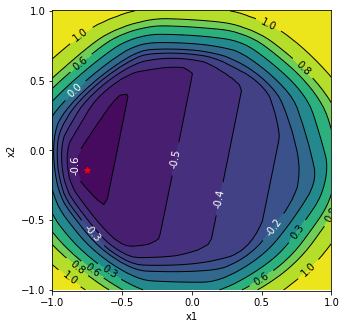

In [18]:
%matplotlib inline

plt.figure(figsize=(6/6*5,6.2/6*5))
plt.axis('equal')

# lvls = 12
lvls = np.sort([1.1, 1, 0.8, 0.6, 0.3, 0, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7])
clrs = ['white','white','white','white','white','white','white','k','k','k','k','k']
plt.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)
cs = plt.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", rightside_up=True, colors=clrs)

plt.scatter(center[0], center[1], color='red', marker='*')

plt.xlabel("x1")
plt.ylabel("x2")
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.title("(b)")
# plt.show()
plt.savefig("./invex_out/out_qc_contour.pdf")

In [19]:
# boundary 
ba0, ba1 = np.nonzero(x1==-1)
bb0, bb1 = np.nonzero(x2==1)
bc0, bc1 = np.nonzero(x1==1)
bc0, bc1 = bc0[::-1], bc1[::-1]
bd0, bd1 = np.nonzero(x2==-1)
bd0, bd1 = bd0[::-1], bd1[::-1]

b0, b1 = np.concatenate((ba0,bb0,bc0,bd0)), np.concatenate((ba1,bb1,bc1,bd1))

bx1 = x1[b0,b1]
bx2 = x2[b0,b1]
by = y[b0,b1]

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


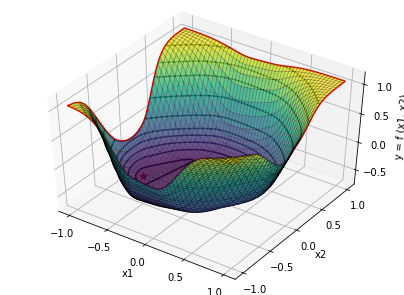

In [20]:
%matplotlib inline

fig = plt.figure(figsize=(7,6.2/6*5))
# fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(45, -55)

ax.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax.contour3D(x1, x2, y, alpha=1, levels=lvls,linestyles="None", colors="k")
ax.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
# ax.plot(bx1, bx2, by, color="k", alpha=1, lw=3)#'dimgray'
ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)


# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)

# plt.title("(a)")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f (x1, x2)')
# plt.pause(10)
# plt.show()
plt.savefig("./invex_out/out_qc_2d_func.pdf")

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


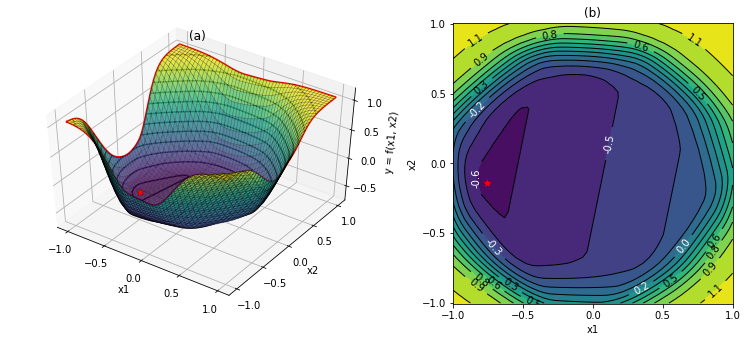

In [21]:
%matplotlib inline

fig = plt.figure(figsize=(6/6*5+7+1,6.2/6*5))
# ax0 = fig.add_subplot(121,projection='3d')
# ax1 = fig.add_subplot(122)
# fig, (ax0, ax1) = plt.subplots(1, 2,
#                                gridspec_kw={'width_ratios': [3, 1]})
# ax1 = fig.add_gridspec()

gspec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[1.36,1])
ax0 = fig.add_subplot(gspec[0, 0], projection='3d')
ax1 = fig.add_subplot(gspec[0, 1])

ax1.axis('equal')
lvls = 12
ax1.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)

clrs = ['white','white','white','white','white','white','white','k','k','k','k','k','k']
cs = ax1.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
ax1.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", colors=clrs)

ax1.scatter(center[0], center[1], color='red', marker='*')

ax1.set_title("(b)")

ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=5)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

############################################
ax0.view_init(45, -55)

ax0.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax0.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax0.contour3D(x1, x2, y, alpha=0.9, levels=lvls, linestyles="None", colors="k")
ax0.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
ax0.plot(bx1, bx2, by, color="red", alpha=1, lw=2)#'dimgray'

# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
ax0.set_title("(a)")

ax0.locator_params(axis='x', nbins=5)
ax0.locator_params(axis='y', nbins=5)
ax0.locator_params(axis='z', nbins=5)
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
ax0.set_zlabel('y = f(x1, x2)')

## plot star over 3d from 2d
plt.scatter([-3.24], [-0.205], marker='*', color='r', clip_on=False, s=30)

plt.savefig("./invex_out/out_qc_func_and_contour.pdf", bbox_inches='tight')
# plt.show()

## Normal Function Plot

In [22]:
with open("./invex_out/2d_ordinary_plot_data.pkl", 'rb') as f:
    data = pickle.load(f)
    
    x1, x2, y = data["x1"], data["x2"], data["y"]

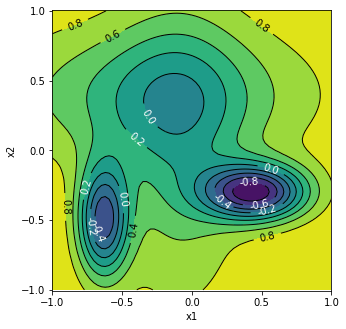

In [23]:
%matplotlib inline

plt.figure(figsize=(6/6*5,6.2/6*5))
plt.axis('equal')

lvls = 12
# lvls = np.sort([1.1, 1, 0.8, 0.6, 0.3, 0, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7])
clrs = ['white','white','white','white','white','white','white','k','k','k','k','k']
plt.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)
cs = plt.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", rightside_up=True, colors=clrs)

# plt.scatter(center0[0], center0[1], color='red', marker='*')

plt.xlabel("x1")
plt.ylabel("x2")
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.title("(b)")
# plt.show()
plt.savefig("./invex_out/out_ordinary_contour.pdf")

In [24]:
# boundary 
ba0, ba1 = np.nonzero(x1==-1)
bb0, bb1 = np.nonzero(x2==1)
bc0, bc1 = np.nonzero(x1==1)
bc0, bc1 = bc0[::-1], bc1[::-1]
bd0, bd1 = np.nonzero(x2==-1)
bd0, bd1 = bd0[::-1], bd1[::-1]

b0, b1 = np.concatenate((ba0,bb0,bc0,bd0)), np.concatenate((ba1,bb1,bc1,bd1))

bx1 = x1[b0,b1]
bx2 = x2[b0,b1]
by = y[b0,b1]

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


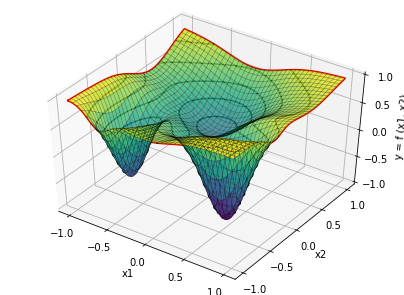

In [25]:
%matplotlib inline

fig = plt.figure(figsize=(7,6.2/6*5))
# fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(45, -55)

ax.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax.contour3D(x1, x2, y, alpha=1, levels=lvls,linestyles="None", colors="k")
# ax.plot(bx1, bx2, by, color="k", alpha=1, lw=3)#'dimgray'
ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)


# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)

# plt.title("(a)")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f (x1, x2)')
# plt.pause(10)
# plt.show()
plt.savefig("./invex_out/out_ordinary_2d_func.pdf")

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


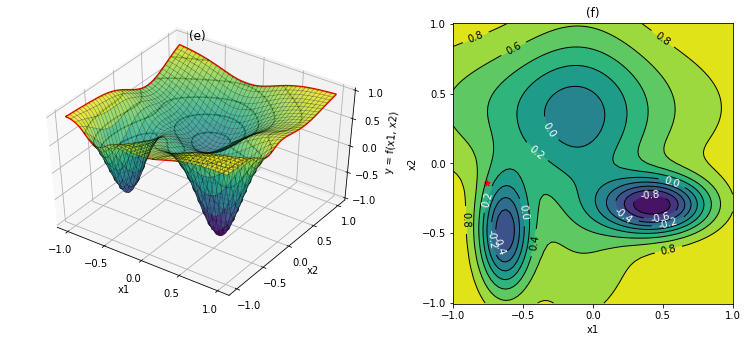

In [26]:
%matplotlib inline

fig = plt.figure(figsize=(6/6*5+7+1,6.2/6*5))
# ax0 = fig.add_subplot(121,projection='3d')
# ax1 = fig.add_subplot(122)
# fig, (ax0, ax1) = plt.subplots(1, 2,
#                                gridspec_kw={'width_ratios': [3, 1]})
# ax1 = fig.add_gridspec()

gspec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[1.36,1])
ax0 = fig.add_subplot(gspec[0, 0], projection='3d')
ax1 = fig.add_subplot(gspec[0, 1])

ax1.axis('equal')
lvls = 12
ax1.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)

clrs = ['white','white','white','white','white','white','white','k','k','k','k','k','k']
cs = ax1.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
ax1.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", colors=clrs)

ax1.scatter(center[0], center[1], color='red', marker='*')

ax1.set_title("(f)")

ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=5)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

############################################
ax0.view_init(45, -55)

ax0.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax0.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax0.contour3D(x1, x2, y, alpha=0.9, levels=lvls, linestyles="None", colors="k")
ax0.plot(bx1, bx2, by, color="red", alpha=1, lw=2)#'dimgray'

# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
ax0.set_title("(e)")

ax0.locator_params(axis='x', nbins=5)
ax0.locator_params(axis='y', nbins=5)
ax0.locator_params(axis='z', nbins=5)
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
ax0.set_zlabel('y = f(x1, x2)')


# plt.savefig("./invex_out/out_ordinary_func_and_contour.pdf", bbox_inches='tight')
# plt.pause(10)
plt.show()

## Convex Data -- Ignore below

In [132]:
import torch
import torch.nn as nn

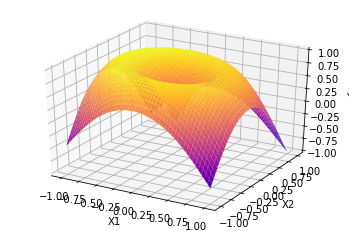

In [226]:
num_points = 50
# X1 = np.linspace(-2.5, 1.9, num_points)
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2.5, 3, num_points)
# X2 = np.linspace(-2.2, 2.1, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
# Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [227]:
class ConvexNN(nn.Module):
    
    def __init__(self, dims:list, actf=nn.ELU):
        super().__init__()
        assert len(dims)>1
        self.dims = dims
        layers = []
        skip_layers = []
        for i in range(len(dims)-1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            if i<len(dims)-2:
                layers.append(actf())
            if i>0:
                skip_layers.append(nn.Linear(dims[0], dims[i+1]))
                
        self.layers = nn.ModuleList(layers)
        self.skip_layers = nn.ModuleList(skip_layers)
#         print(layers)
#         print(skip_layers)
        
    def forward(self,x):
        h = x
        for i in range(len(self.dims)-1):
#             print(i)
#             print(self.layers[i*2])
            self.layers[i*2].weight.data = torch.abs(self.layers[i*2].weight.data)
            h = self.layers[i*2](h)
            if i>0:
                h += self.skip_layers[i-1](x)
            if i<len(self.dims)-2:
                h = self.layers[i*2+1](h)
        return -h

In [233]:
# actf = nn.LeakyReLU
actf = nn.ELU
# actf = nn.Softplus

torch.manual_seed(111)
# cvxNet = ConvexNN([2,20,20,20,1], actf)
cvxNet = nn.Sequential(
    nn.Linear(2,100),
    actf(),
    nn.Linear(100,1)  )

optimizer = torch.optim.Adam(cvxNet.parameters(), lr=0.005)
criterion = nn.MSELoss()

Epoch: 0, Loss:1.1560986042022705


Epoch: 100, Loss:0.06424438208341599


Epoch: 200, Loss:0.05558538809418678


Epoch: 300, Loss:0.0507332868874073


Epoch: 400, Loss:0.04634677618741989


Epoch: 500, Loss:0.04263855516910553


Epoch: 600, Loss:0.03957796469330788


Epoch: 700, Loss:0.03675076737999916


Epoch: 800, Loss:0.03418141230940819


Epoch: 900, Loss:0.031664226204156876


Epoch: 1000, Loss:0.02920754998922348


Epoch: 1100, Loss:0.026972973719239235


Epoch: 1200, Loss:0.02512652613222599


Epoch: 1300, Loss:0.023648910224437714


Epoch: 1400, Loss:0.02258158288896084


Epoch: 1500, Loss:0.021694887429475784


Epoch: 1600, Loss:0.020991595461964607


Epoch: 1700, Loss:0.020479045808315277


Epoch: 1800, Loss:0.020081447437405586


Epoch: 1900, Loss:0.01976471208035946


Epoch: 2000, Loss:0.019534384831786156


Epoch: 2100, Loss:0.019355613738298416


Epoch: 2200, Loss:0.01980423927307129


Epoch: 2300, Loss:0.019108787178993225


Epoch: 2400, Loss:0.01901245303452015


Epoc

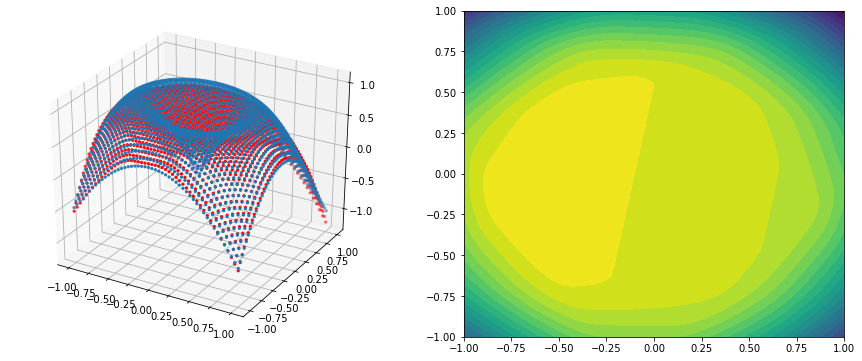

In [234]:
%matplotlib tk

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)
# ax.view_init(28,20)

for epoch in range(5000):
    cvxNet[2].weight.data = -torch.abs(cvxNet[2].weight.data)

    yout = cvxNet(xx)    
    loss = criterion(yout, yy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if epoch%100 == 0:
        print(f'Epoch: {epoch}, Loss:{float(loss)}')

        ax.clear()
        ax.scatter(X1, X2, yy.data.numpy().reshape(-1), marker= '.')
        ax.scatter(X1, X2, yout.data.numpy().reshape(-1), color='r', marker='.')
        
        ax2.clear()
        ax2.contourf(X1, X2, yout.data.numpy().reshape(Y.shape), levels=20)

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")

In [235]:
%matplotlib tk

y_ = nn.functional.softplus(-yout.data+0.5, beta=-5)
y_ = nn.functional.softplus(y_, beta=5)
y_ = y_.numpy().reshape(Y.shape)*15 - 1

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
# ax.view_init(43, -49)
ax.view_init(49, -71)
ax.plot_surface(X1, X2, y_, cmap='plasma', alpha=0.9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.pause(10)
plt.show()

TclError: can't invoke "update" command: application has been destroyed

In [238]:
am = np.argmin(y_.reshape(-1))
cx1, cx2, cy = X1.reshape(-1)[am], X2.reshape(-1)[am], y_.reshape(-1)[am]
cx1, cx2, cy

(-0.7551020408163265, -0.1428571428571428, -0.6381984)

In [240]:
# with open("../Paper_Material/invex_out/2d_quasiConvex_plot_data.pkl", 'wb') as f:
#     data = {
#         "x1":X1,
#         "x2":X2,
#         "y":y_,
#         "center": (cx1,cx2, cy)
#     }
#     pickle.dump(data, f)

## Ordinary function

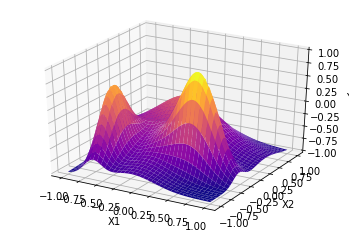

In [273]:
# The two-dimensional domain of the fit.....
########https://scipython.com/blog/non-linear-least-squares-fitting-of-a-two-dimensional-data/#########
x1min, x1max, nx1 = -5, 6, 75
x2min, x2max, nx2 = -3, 7, 75
x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
X1, X2 = np.meshgrid(x1, x2)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
    return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# A list of the Gaussian parameters: x10, x20, x1alpha, x2alpha, A
gprms = [(0, 2, 2.5, 5.4, 1.5),
         (-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         (3, 0.5, 2, 1, 5)
        ]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# The function to be fit is Z.
Y = np.zeros(X1.shape)
for p in gprms:
    Y += gaussian(X1, X2, *p)
### Adding noise to the data
# noise_sigma = 0.1
# Z += noise_sigma * np.random.randn(*Z.shape)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

## reusing the variable name
x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

# Plot the 3D figure of the fitted function and the residuals.
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matp

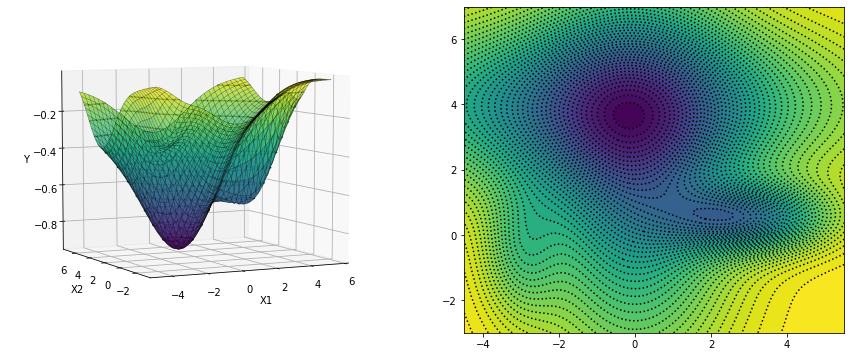

In [339]:
%matplotlib tk

x1min, x1max, nx1 = -4.5, 5.5, 75
x2min, x2max, nx2 = -3, 7, 75
x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
X1, X2 = np.meshgrid(x1, x2)

# A list of the Gaussian parameters: x10, x20, x1alpha, x2alpha, A
gprms = np.array([[0, 2, 2.5, 5.4, 1.5],
         [-1, 4, 6, 2.5, 1.8],
         [-3, -0.5, 1, 2, 4],
         [3, 0.5, 2, 1, 5]
        ])

gprms[:, 4] = [0.5,0.5,0.2,0.47]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# The function to be fit is Z.
Y = np.zeros(X1.shape)
for p in gprms:
    Y += gaussian(X1, X2, *p)
Y = -Y
### Adding noise to the data
# noise_sigma = 0.1
# Z += noise_sigma * np.random.randn(*Z.shape)

####Scaling the data to range -1,1
# X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
# X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
# Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)
# ax.view_init(-10, 125)
ax.view_init(0, -110)

# ax.clear()
ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(X1, X2, Y, alpha=0.5, lw=0.5, color='k')
ax.contour3D(X1, X2, Y, alpha=0.9, levels=lvls, linestyles="None", colors="k")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# ax2.clear()
ax2.contourf(X1, X2, Y, levels=60)
ax2.contour(X1, X2, Y, levels=60, colors='k', linestyles='dotted')

plt.pause(10)
plt.show()

In [311]:
%matplotlib tk

y_ = -Y
# y_ = nn.functional.softplus(-yout.data+0.5, beta=-5)
# y_ = nn.functional.softplus(y_, beta=5)
# y_ = y_.numpy().reshape(Y.shape)*15 - 1

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
ax.plot_surface(X1, X2, y_, cmap='plasma', alpha=0.9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.pause(10)
plt.show()

TclError: can't invoke "update" command: application has been destroyed

In [208]:
# with open("../Paper_Material/invex_out/2d_ordinary_plot_data.pkl", 'wb') as f:
#     data = {
#         "x1":X1,
#         "x2":X2,
#         "y":y_,
#     }
#     pickle.dump(data, f)

In [228]:
a = np.array(gprms)[:,0]
b = np.array(gprms)[:,1]

cents = np.column_stack((2*(a-x1min)/(x1max-x1min)-1, (b-x2min)/(x2max-x2min)*2-1))
cents

array([[-0.09090909,  0.        ],
       [-0.27272727,  0.4       ],
       [-0.63636364, -0.5       ],
       [ 0.45454545, -0.3       ]])

In [232]:
(X1==cents[0,0]).astype(float).sum()

0.0

37